# Lab 3

In [76]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [77]:
DATA_PATH = '../data/'
START_DATE = '01/02/2007'
END_DATE = '02/02/2007'

## Car MPG

### Download

In [78]:
car_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

car_mpg['mpg']
car_mpg.mpg
car_mpg.iloc[0,:]

car_mpg.to_csv(f'{DATA_PATH}car_mpg.csv', index=False)
car_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


### Preprocess

In [79]:
for col in list(car_mpg)[:-1]:
    v = int(car_mpg[col].mean())
    car_mpg[col] = car_mpg[col].fillna(v)
car_mpg['company'] = car_mpg.car_name.str.split(expand=True)[0].values
car_mpg.to_csv(f'{DATA_PATH}car_mpg_preprocessed.csv', index = False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500,ford
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala,chevrolet
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii,plymouth
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina,pontiac
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl,amc


In [80]:
car_mpg = pd.read_csv(f'{DATA_PATH}car_mpg_preprocessed.csv')
car_mpg.head(30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500,ford
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala,chevrolet
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii,plymouth
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina,pontiac
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl,amc


## Electric Power Compsumtion

### Preprocess

In [81]:
# # Read data
# power = pd.read_csv('../data/household_power_consumption.csv', delimiter=';')

# # Convert to datetime dtype
# power.Date = pd.to_datetime(power.Date)

# # Get date from START_DATE to END_DATE
# power = power[(power['Date'] >= START_DATE) & (power['Date'] <= END_DATE)]
# # power1 = power[power.Date == START_DATE]
# # power2 = power[power.Date == END_DATE]
# # power = pd.concat([power1, power2])

# # Write preprocessed data to csv
# power.to_csv('../data/household_power_consumption_preprocessed.csv', index = False)
# power1

In [82]:
power = pd.read_csv(f'{DATA_PATH}household_power_consumption_preprocessed.csv')
power

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-01-02,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,2007-01-02,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,2007-01-02,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,2007-01-02,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,2007-01-02,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2875,2007-02-02,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
2876,2007-02-02,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
2877,2007-02-02,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
2878,2007-02-02,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0


### Plot 1

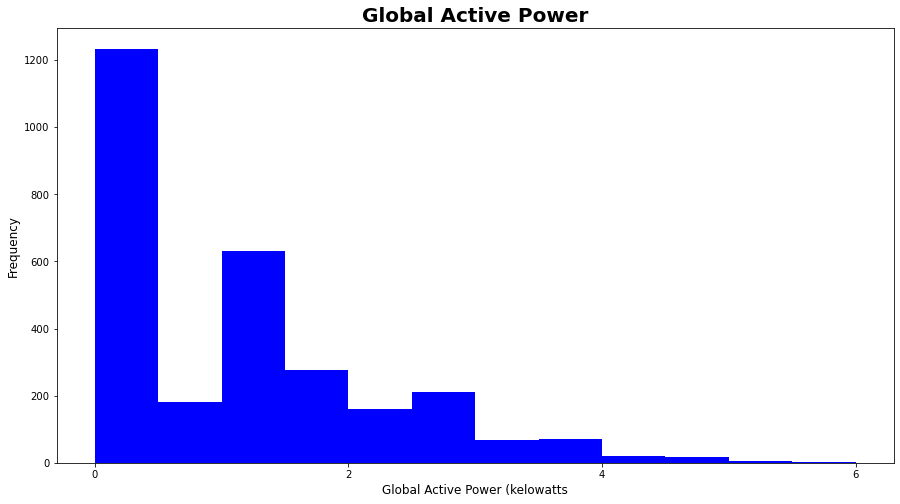

In [83]:
num_bins = 12
plt.figure(figsize =(15,8))
plt.hist(power['Global_active_power'].values, bins=np.arange(0, 6.5, 0.5), facecolor='blue')
plt.title('Global Active Power', fontweight='bold', fontsize=20)
plt.xlabel('Global Active Power (kelowatts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0,7,2))
plt.show()

### Plot 2

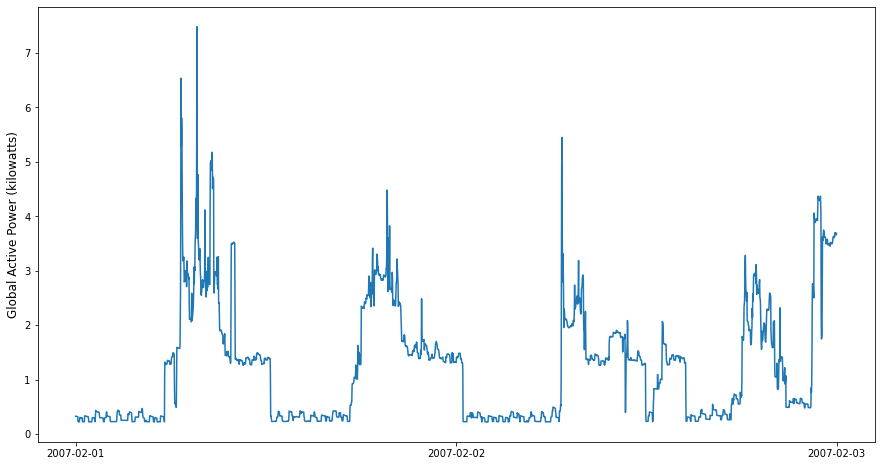

In [84]:
plt.figure(figsize =(15,8))
plt.plot(power['Global_active_power'].values)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.xticks([0, 1440, 2880], ['2007-02-01', '2007-02-02', '2007-02-03'])
plt.show()

### Plot 3

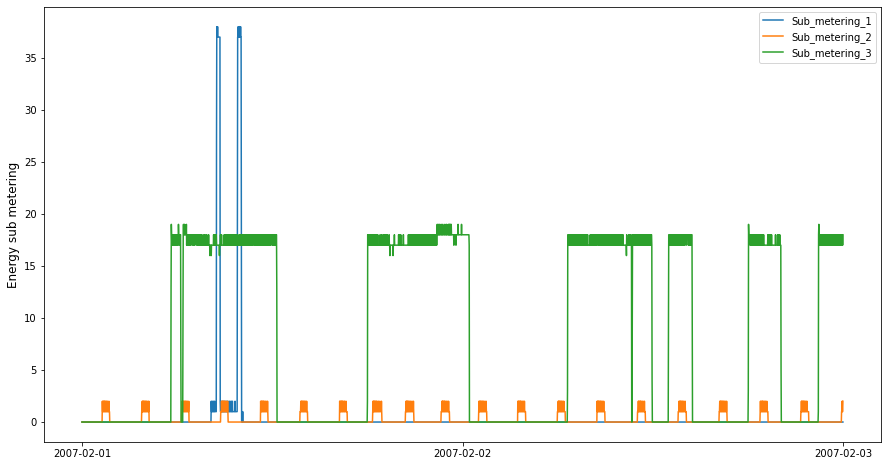

In [85]:
plt.figure(figsize =(15,8))
plt.plot(power['Sub_metering_1'].values)
plt.plot(power['Sub_metering_2'].values)
plt.plot(power['Sub_metering_3'].values)
plt.ylabel('Energy sub metering', fontsize=12)
plt.xticks([0, 1440, 2880], ['2007-02-01', '2007-02-02', '2007-02-03'])
plt.legend(['Sub_metering_1','Sub_metering_2','Sub_metering_3'], loc = "upper right")
plt.show()

### Plot 4

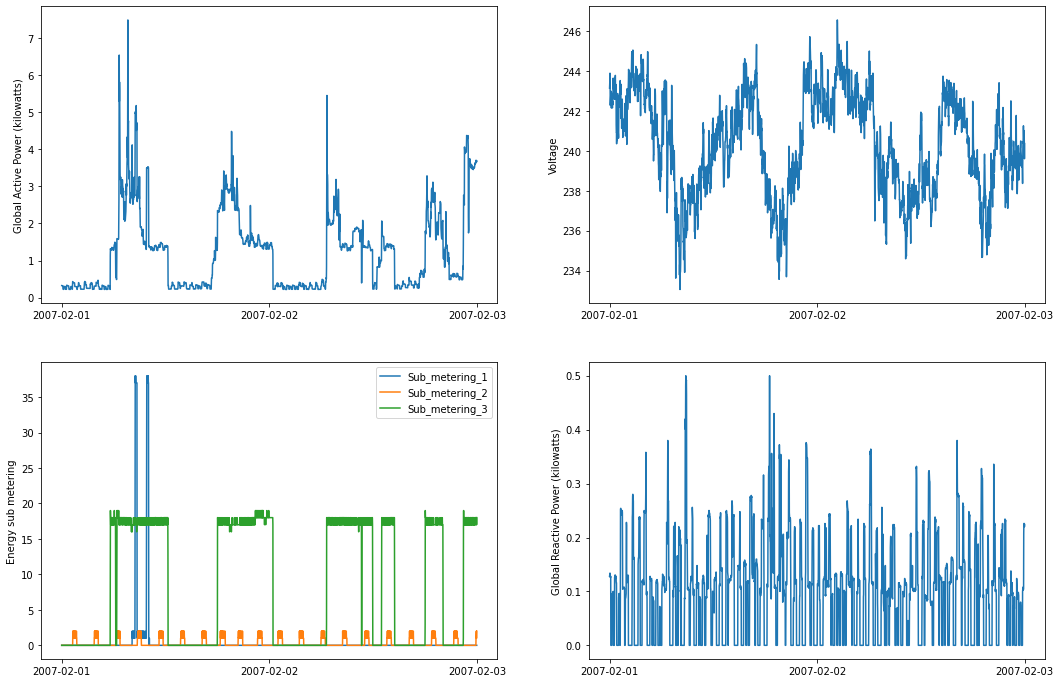

In [86]:
fig, axes = plt.subplots(2,2,figsize=(18,12))

axes[0, 0].plot(power['Global_active_power'].values)
axes[0, 0].set_ylabel('Global Active Power (kilowatts)')
axes[0, 0].set_xticks([0, 1440, 2880])
axes[0, 0].set_xticklabels(['2007-02-01', '2007-02-02', '2007-02-03'])

axes[0, 1].plot(power['Voltage'].values)
axes[0, 1].set_ylabel('Voltage')
axes[0, 1].set_xticks([0, 1440, 2880])
axes[0, 1].set_xticklabels(['2007-02-01', '2007-02-02', '2007-02-03'])

axes[1, 0].plot(power['Sub_metering_1'].values)
axes[1, 0].plot(power['Sub_metering_2'].values)
axes[1, 0].plot(power['Sub_metering_3'].values)
axes[1, 0].set_ylabel('Energy sub metering')
axes[1, 0].set_xticks([0, 1440, 2880])
axes[1, 0].set_xticklabels(['2007-02-01', '2007-02-02', '2007-02-03'])
axes[1, 0].legend(['Sub_metering_1','Sub_metering_2','Sub_metering_3'], loc = "upper right")

axes[1, 1].plot(power['Global_reactive_power'].values)
axes[1, 1].set_ylabel('Global Reactive Power (kilowatts)')
axes[1, 1].set_xticks([0, 1440, 2880])
axes[1, 1].set_xticklabels(['2007-02-01', '2007-02-02', '2007-02-03'])
plt.show()